# Iris Flower Classication 
### Data Science Intern
### LGMVIP - August 2022
### Task -1 (Beginner Level)

#### Importing Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score


In [50]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [51]:
df.drop(columns='Id',inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [52]:
df.shape

(150, 5)

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [55]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [56]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Data Visualisation

In [57]:
plt.style.use('seaborn')

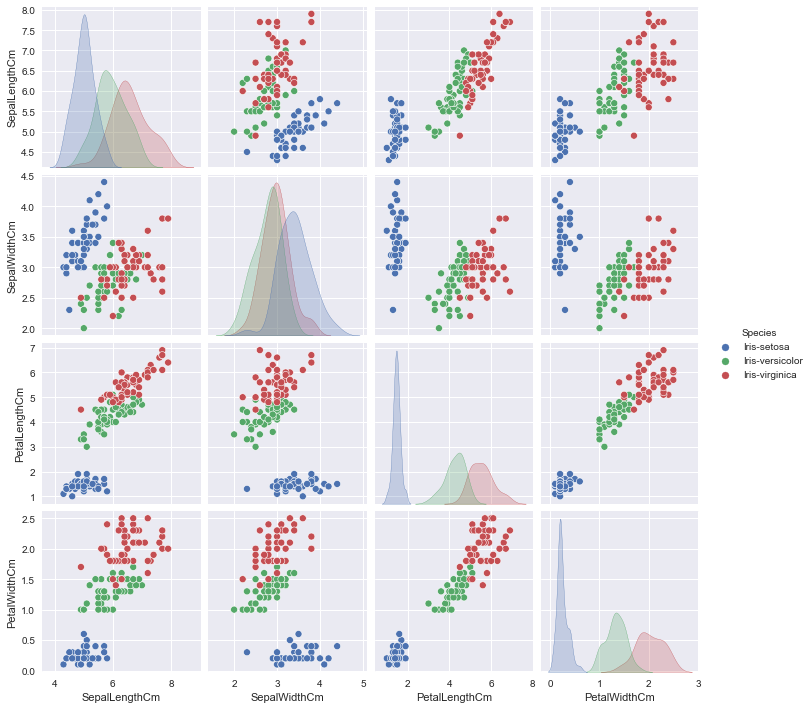

In [58]:
sns.pairplot(df,hue="Species")

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

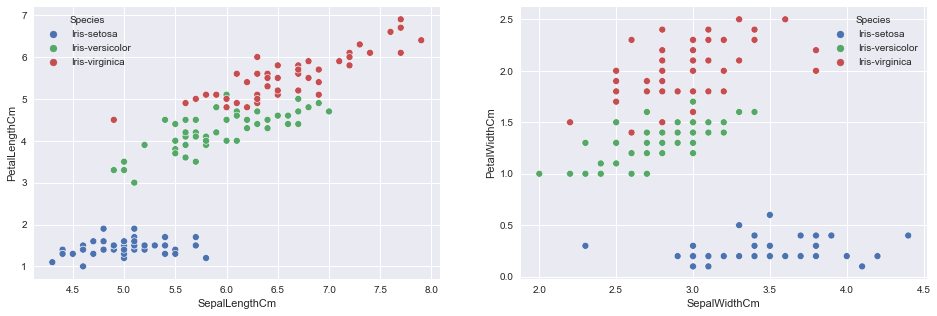

In [59]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df,hue='Species',ax=ax1)
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=df,hue='Species',ax=ax2)

<AxesSubplot:ylabel='PetalWidthCm'>

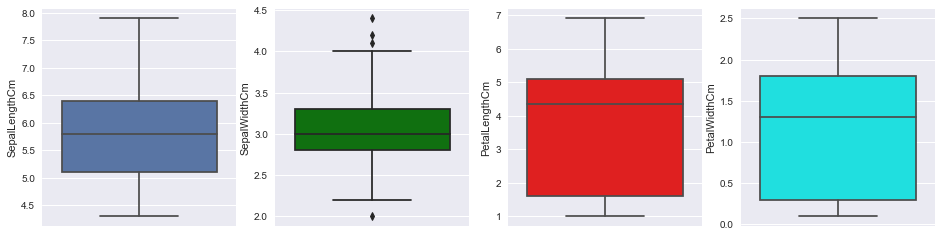

In [60]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df,y='SepalLengthCm')
plt.subplot(1,4,2)
sns.boxplot(data=df,y='SepalWidthCm', color= 'green')
plt.subplot(1,4,3)
sns.boxplot(data=df,y='PetalLengthCm',color='red')
plt.subplot(1,4,4)
sns.boxplot(data=df,y='PetalWidthCm',color='cyan')

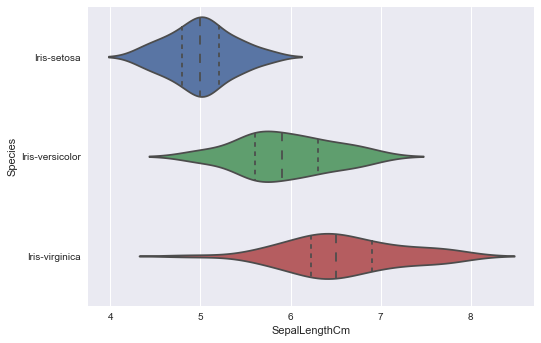

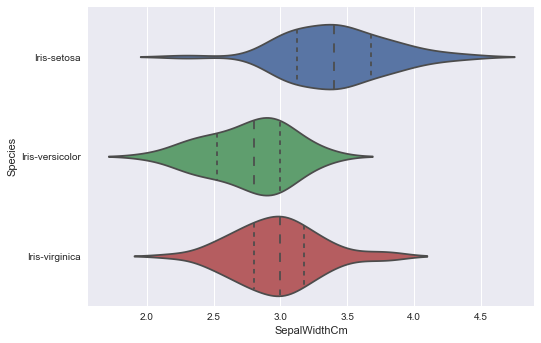

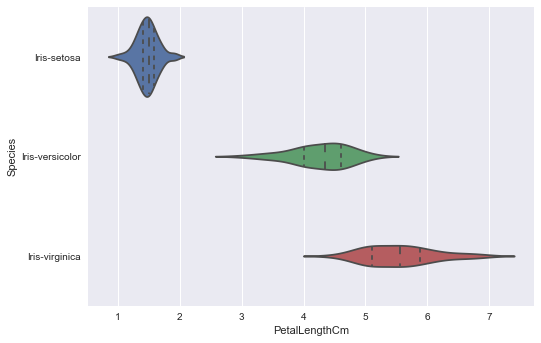

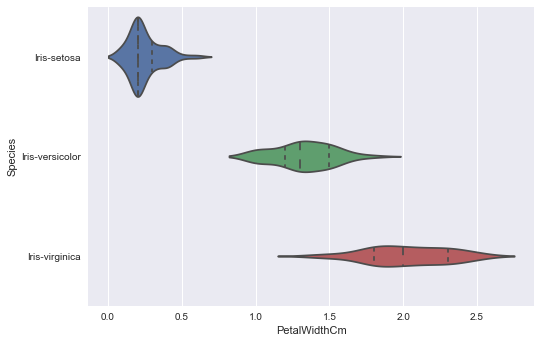

In [61]:
sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

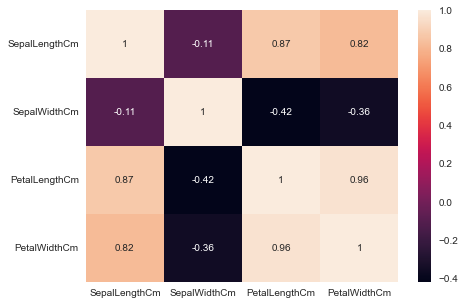

In [65]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Model Building

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [71]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [72]:
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
116,6.5,3.0,5.5,1.8,2
3,4.6,3.1,1.5,0.2,0
42,4.4,3.2,1.3,0.2,0
31,5.4,3.4,1.5,0.4,0
10,5.4,3.7,1.5,0.2,0
40,5.0,3.5,1.3,0.3,0
107,7.3,2.9,6.3,1.8,2
98,5.1,2.5,3.0,1.1,1
95,5.7,3.0,4.2,1.2,1
138,6.0,3.0,4.8,1.8,2


In [73]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

#### KNN

In [81]:
KNN=KNeighborsClassifier(n_neighbors=6)

In [82]:
KNN.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [85]:
# Predict on the test set and calculate accuracy
y_pred=KNN.predict(x_test)
score=accuracy_score(y_test,y_pred)
rscoreknn=r2_score(y_test,y_pred)

In [86]:
print('Accuracy score : {}'.format(score))
print('R2 score score : {}'.format(rscoreknn))

Accuracy score : 0.9777777777777777
R2 score score : 0.9610051993067591


####  Logistic Regression

In [87]:
lg= LogisticRegression(max_iter=1000)
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [88]:
# Predict the test set and calculate accuracy
y_pred=lg.predict(x_test)
score=accuracy_score(y_test,y_pred)
rscorelog=r2_score(y_test,y_pred)

In [89]:
print('Accuracy score : {}'.format(score))
print('R2 score score : {}'.format(rscorelog))

Accuracy score : 1.0
R2 score score : 1.0


This is mind blowing we are getting an accuracy of 100% with logistic regression.

# 100% Accuracy Score :)